In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt

In [2]:
## cellulose

NAPO_1 = pd.read_excel("specs - AndreaChavez-2025.07.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'specs - AndreaChavez-2025.07.xlsx'

In [6]:
results_ISMR = pd.read_excel("Resultis_ISMR_10072024.xlsx", sheet_name = "seq 1")
results_ISMR.head(3)
subset = results_ISMR[["number of samples","sample-ID","[C] m/m (%)","δ13C (‰ v.s. V-PDB)"]]
subset

,number of samples,sample-ID,[C] m/m (%),δ13C (‰ v.s. V-PDB)
0,1.0,4027.0,44.170880,-28.82
1,2.0,4036.0,44.530169,-27.59
2,3.0,4050.0,44.471701,-27.12
3,4.0,8023.0,44.043952,-28.40
4,5.0,4249.0,45.224579,-26.40
...,...,...,...,...
83,83.0,3150.0,45.442475,-30.30
84,84.0,3151.0,43.727733,-26.87
85,85.0,4194.0,44.221486,-27.29
86,86.0,1738.0,45.432781,-29.17


In [7]:
all_samples = pd.read_excel("Samples_Andrea_Jurgen.xlsx")
all_samples.head(3)

df1 = subset.merge(all_samples,left_on="sample-ID",right_on="treeID_new")
df1["collection year"]= 2023
df1["sample type"]= "leaf sample"

df2 = subset.merge(all_samples,left_on="sample-ID",right_on="treeID_old")
df2["collection year"]= 2023
df2["sample type"]= "leaf sample"

df3 = subset.merge(all_samples,left_on="sample-ID",right_on="herbarium specimen")
df3["sample type"]= "herbarium" #okay

df4 = subset.merge(all_samples,left_on="sample-ID",right_on="leaf_sample_ID_2011")
df4["collection year"]= 2011
df4["sample type"]= "leaf sample" #okay


C:\Users\selene.baez\AppData\Local\Temp\ipykernel_11040\108387219.py:4: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df1 = subset.merge(all_samples,left_on="sample-ID",right_on="treeID_new")


In [9]:
all = pd.concat([df1,df2,df3,df4])
all = all.drop_duplicates(subset=['number of samples']) #deletes duplicates problems between new tree ID and old tree ID
all.to_excel("Isotope_results_OYC_GUA.xlsx")


In [10]:
all['Site'] = all['Site'].astype('category')
all['species'] = all["species"].astype('category')
all['collection year'] = all["collection year"].astype('category')


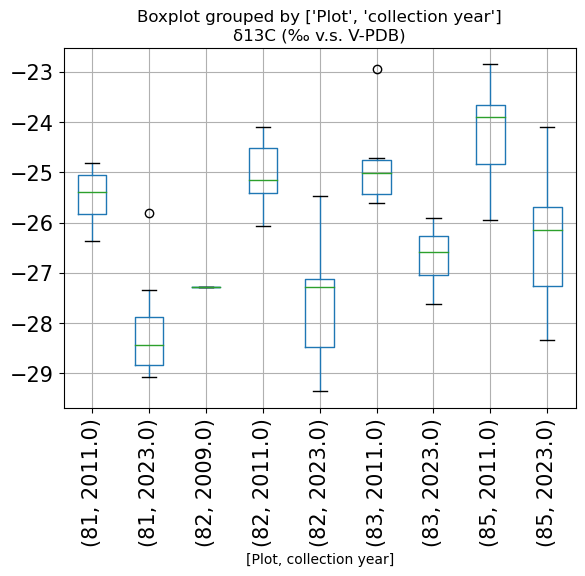

In [11]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

oyacachi = all[all["Site"] == "Oyacachi"]
boxplot = oyacachi.boxplot(column = ['δ13C (‰ v.s. V-PDB)'], by =["Plot","collection year",],rot=90, fontsize=15)  
#ax = sns.boxplot(x="collection year",y='δ13C (‰ v.s. V-PDB)',data= oyacachi)
#ax = sns.stripplot(x="collection year",y='δ13C (‰ v.s. V-PDB)',data= oyacachi,s=5,hue ="treeID_new",legend= False)


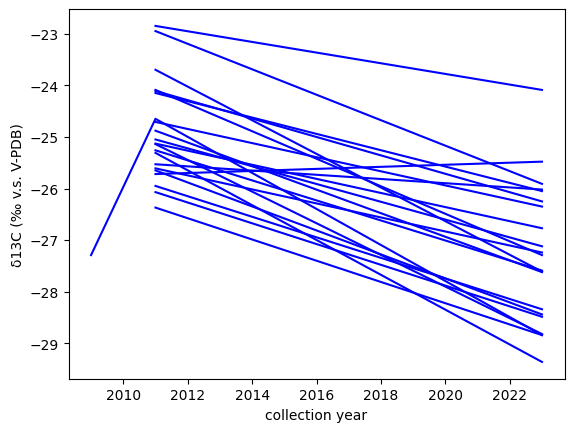

In [ ]:
ax = sns.lineplot(
    data=oyacachi, x="collection year", y='δ13C (‰ v.s. V-PDB)',
    color="blue", estimator=None, units = "treeID_new"
) #connected by the same tree

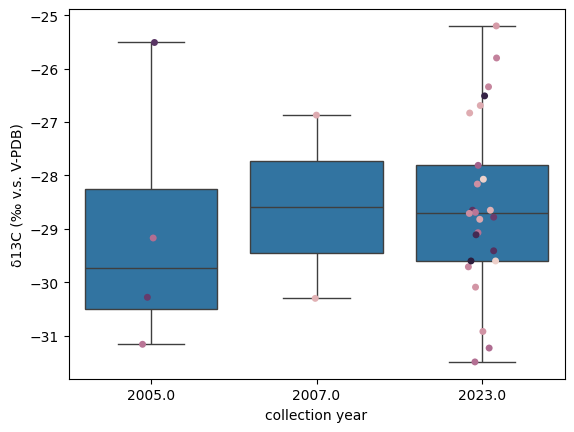

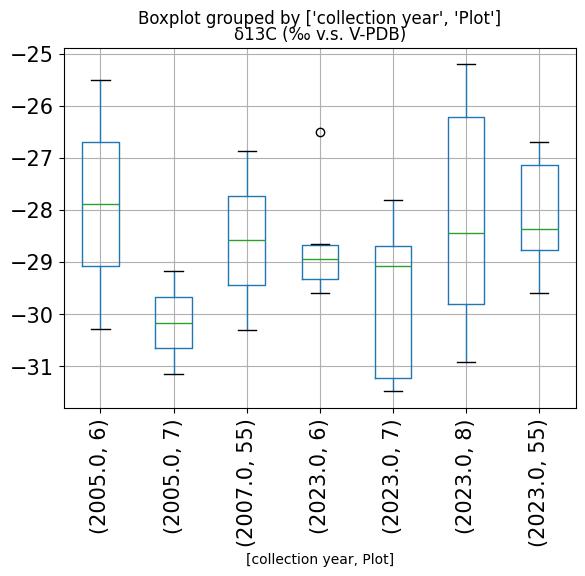

In [ ]:
gua = all[all["Site"] == "Guacamayos"]
ax = sns.boxplot(x="collection year",y='δ13C (‰ v.s. V-PDB)',data= gua)
ax = sns.stripplot(x="collection year",y='δ13C (‰ v.s. V-PDB)',data= gua,s=5,hue ="treeID_new",legend= False)

boxplot = gua.boxplot(column = ['δ13C (‰ v.s. V-PDB)'], by =["collection year","Plot"],rot=90, fontsize=15)  

